## Exploration of Splitted CheXpert Data

Only frontal images are used, zeros policy adopted for uncertainty labels. 5 clients with individual train, validation and test splits.  

Number of patients in client splits: [12908, 12908, 12908, 12908, 12908]  
Number of images in client splits: [45493, 44292, 44996, 44579, 44054]  

Lateral images are removed subsequently. Splits without lateral images:  

Patients in client splits: [12907, 12907, 12907, 12906, 12908]  
Number of images in client splits: [38983, 37835, 38571, 38024, 37614]

Splitting was done with ```split_chexpert.py```, random seed is 206.

It can be seen that because the dataset is so large, random splitting results in balanced and IID data splits between clients and within training, validation and test sets within individual clients. Further stratification methods are therefore unnecessary for this baseline case.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def process_csv_file(path):
    
    df = pd.read_csv(path)
    df.fillna(0, inplace=True)
    df.replace(-1, 0, inplace=True)
    
    return df

In [20]:
def plot_label_distribution(df, save_fig=False, img_path='./labels.png'):
    
    """Plot distribution of positive and negative labels per finding for a given dataframe obtained from
    original CheXpert CSV. Assumes no uncertain labels are present, i.e. only 1 and 0 labels."""
    
    pos = df[df == 1.0].iloc[:,5:].count()
    neg = df[df == 0].iloc[:,5:].count()
    
    X = list(pos.index)
    X_axis = np.arange(len(pos))

    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(5)

    plt.bar(X_axis, pos, -0.2, label = 'Positive')
    plt.bar(X_axis+0.2, neg, 0.2, label='Negative')

    plt.xticks(X_axis, X)
    plt.xlabel("Labels")
    plt.ylabel("Number of Data Points")
    plt.title("Label Distribution, Validation Client 0")
    plt.legend()
    plt.xticks(rotation=50)

    plt.tight_layout()

    if save_fig:
        f.savefig(img_path)

    plt.plot()
    plt.show()
    
    return pos, neg

### Original training data

In [4]:
train_chex_path = './CheXpert-v1.0-small/train.csv'
train_chex = pd.read_csv(train_chex_path)

In [5]:
# original training CSV preprocessing
train_chex.fillna(0, inplace=True)
#replace uncertainty labels with 0
train_chex.replace(-1, 0, inplace=True)

In [4]:
train_chex.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


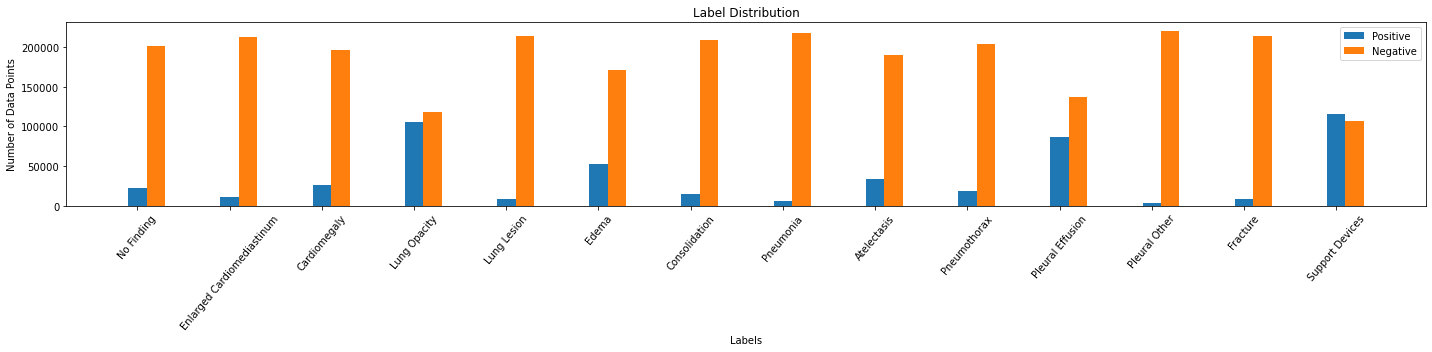

In [6]:
pos, neg = plot_label_distribution(train_chex)

In [18]:
pos

No Finding                     22381
Enlarged Cardiomediastinum     10798
Cardiomegaly                   27000
Lung Opacity                  105581
Lung Lesion                     9186
Edema                          52246
Consolidation                  14783
Pneumonia                       6039
Atelectasis                    33376
Pneumothorax                   19448
Pleural Effusion               86187
Pleural Other                   3523
Fracture                        9040
Support Devices               116001
dtype: int64

### Client 0 

In [8]:
client0_path = './CheXpert-v1.0-small/client0/client0.csv'
client0 = pd.read_csv(client0_path)

In [9]:
client0.fillna(0, inplace=True)
client0.replace(-1, 0, inplace=True)

In [10]:
client0.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,CheXpert-v1.0-small/train/patient00010/study1/...,Female,50,Frontal,PA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CheXpert-v1.0-small/train/patient00017/study1/...,Female,56,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,CheXpert-v1.0-small/train/patient00017/study2/...,Female,56,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
len(client0)

38983

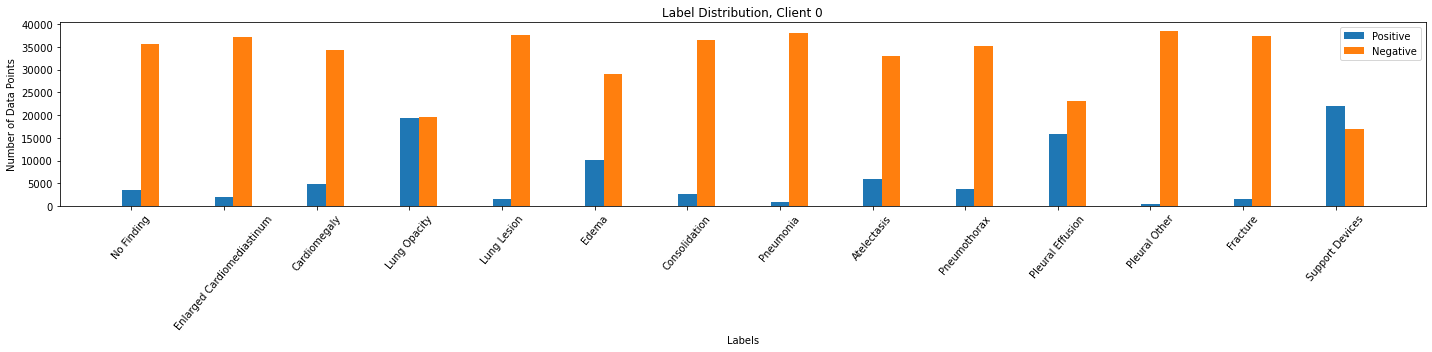

In [17]:
pos0, neg0 = plot_label_distribution(client0, save_fig=True, img_path='../../visualization/data/client0_label.png')

In [20]:
pos0

No Finding                     3419
Enlarged Cardiomediastinum     1895
Cardiomegaly                   4736
Lung Opacity                  19352
Lung Lesion                    1461
Edema                         10052
Consolidation                  2571
Pneumonia                       893
Atelectasis                    6022
Pneumothorax                   3769
Pleural Effusion              15847
Pleural Other                   535
Fracture                       1511
Support Devices               21956
dtype: int64

#### Train, Val, Test

In [19]:
client0_path = './CheXpert-v1.0-small/client0/'
client0_split_paths = [client0_path+'client_train.csv', client0_path+'client_val.csv', client0_path+'client_test.csv']
client0_split = [process_csv_file(path) for path in client0_split_paths]

Number of patients in splits: [9035, 1936, 1936]  
Number of images in splits: [27325, 5698, 5960]

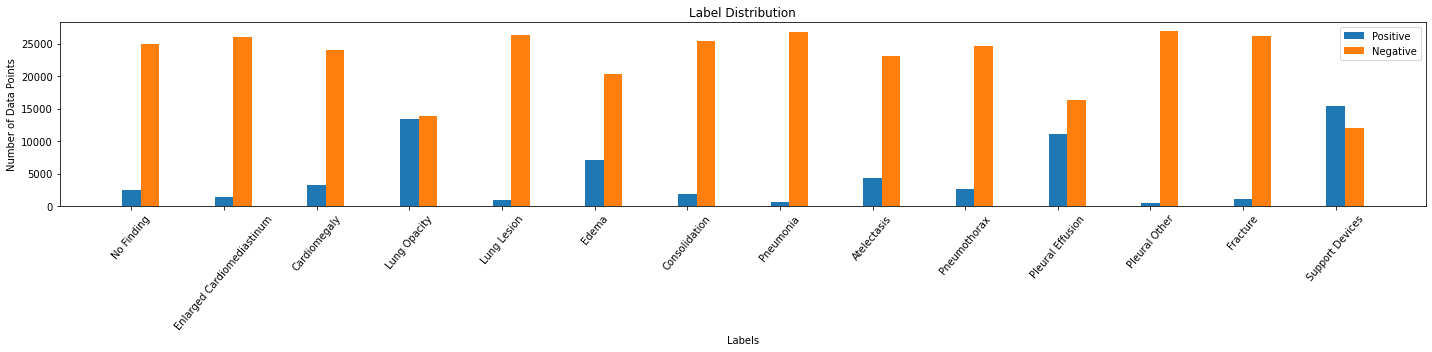

27325


In [55]:
#training
plot_label_distribution(client0_split[0])
print(len(client0_split[0]))

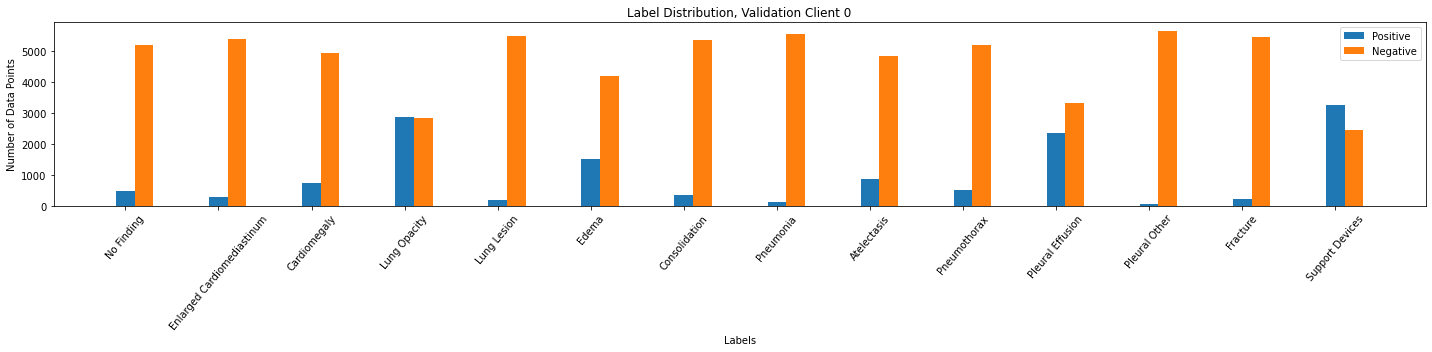

5698


In [21]:
#validation
pos0, neg0 = plot_label_distribution(client0_split[1], save_fig=True, img_path='../../visualization/data/client0_val.png')
print(len(client0_split[1]))

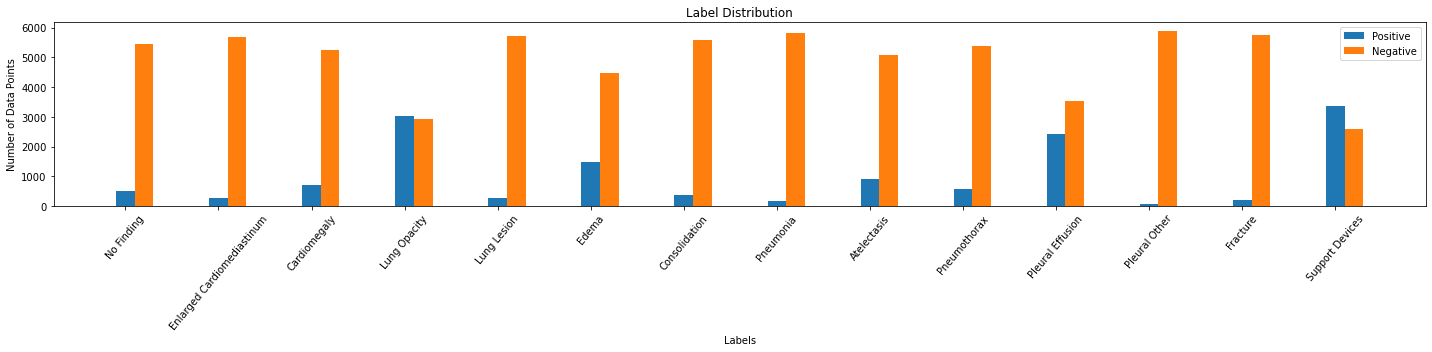

5960


In [57]:
#test
plot_label_distribution(client0_split[2])
print(len(client0_split[2]))

### Client 1 

In [21]:
client1_path = './CheXpert-v1.0-small/client1.csv'
client1 = pd.read_csv(client1_path)

In [22]:
client1.fillna(0, inplace=True)
client1.replace(-1, 0, inplace=True)

In [23]:
client1.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00011/study13...,Female,22,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/train/patient00011/study1/...,Female,19,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/train/patient00011/study5/...,Female,19,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,CheXpert-v1.0-small/train/patient00011/study7/...,Female,19,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,CheXpert-v1.0-small/train/patient00011/study4/...,Female,19,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [63]:
len(client1)

37835

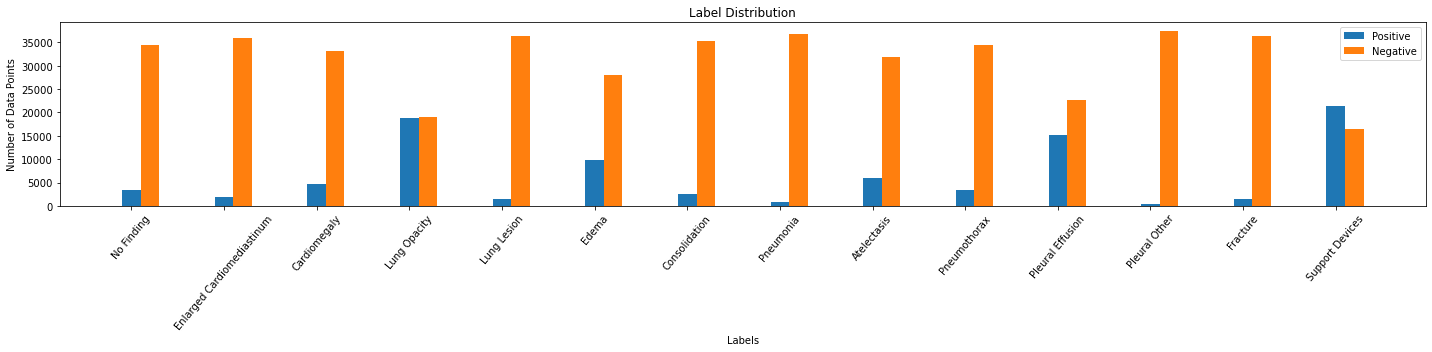

In [24]:
pos1, neg1 = plot_label_distribution(client1)

In [25]:
pos1

No Finding                     3369
Enlarged Cardiomediastinum     1871
Cardiomegaly                   4671
Lung Opacity                  18797
Lung Lesion                    1447
Edema                          9803
Consolidation                  2518
Pneumonia                       954
Atelectasis                    6076
Pneumothorax                   3459
Pleural Effusion              15111
Pleural Other                   445
Fracture                       1474
Support Devices               21308
dtype: int64

#### Train, Val, Test

In [59]:
client1_path = './CheXpert-v1.0-small/client1/'
client1_split_paths = [client1_path+'client_train.csv', client1_path+'client_val.csv', client1_path+'client_test.csv']
client1_split = [process_csv_file(path) for path in client1_split_paths]

Number of patients in splits: [9035, 1936, 1936]  
Number of images in splits: [26463, 5881, 5491]

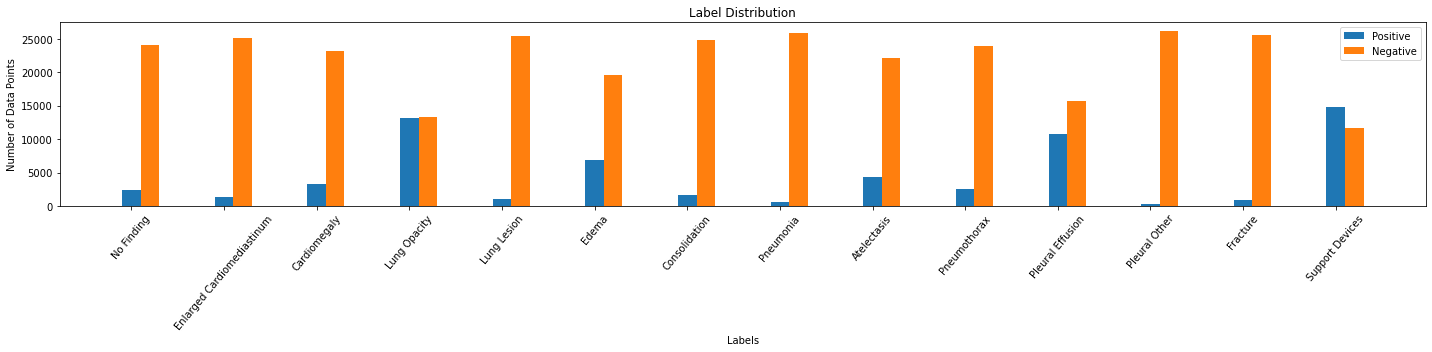

26463


In [60]:
#training
plot_label_distribution(client1_split[0])
print(len(client1_split[0]))

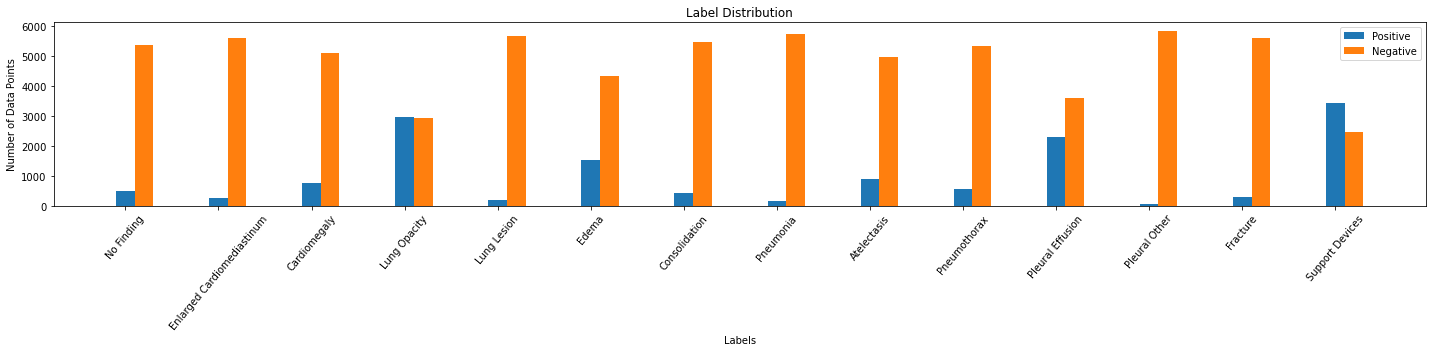

5881


In [61]:
#validation
plot_label_distribution(client1_split[1])
print(len(client1_split[1]))

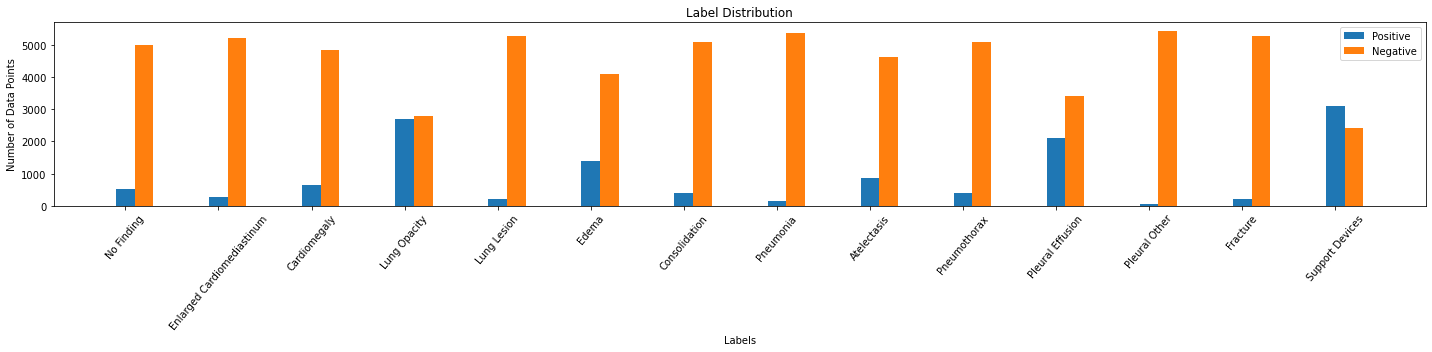

5491


In [62]:
#test
plot_label_distribution(client1_split[2])
print(len(client1_split[2]))

### Client 2

In [26]:
client2_path = './CheXpert-v1.0-small/client2.csv'
client2 = pd.read_csv(client2_path)

In [27]:
client2.fillna(0, inplace=True)
client2.replace(-1, 0, inplace=True)

In [28]:
client2.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00005/study1/...,Male,33,Frontal,PA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CheXpert-v1.0-small/train/patient00005/study2/...,Male,33,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,CheXpert-v1.0-small/train/patient00005/study2/...,Male,33,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,CheXpert-v1.0-small/train/patient00013/study1/...,Male,36,Frontal,PA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/train/patient00016/study1/...,Female,54,Frontal,PA,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [64]:
len(client2)

38571

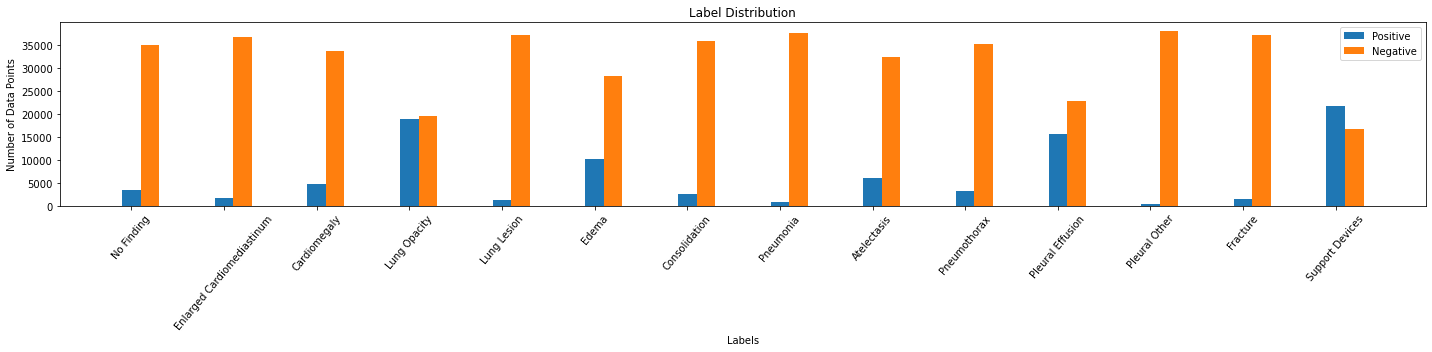

In [29]:
pos2, neg2 = plot_label_distribution(client2)

In [30]:
pos2

No Finding                     3440
Enlarged Cardiomediastinum     1833
Cardiomegaly                   4852
Lung Opacity                  18991
Lung Lesion                    1329
Edema                         10277
Consolidation                  2711
Pneumonia                       930
Atelectasis                    6018
Pneumothorax                   3357
Pleural Effusion              15631
Pleural Other                   488
Fracture                       1430
Support Devices               21781
dtype: int64

#### Train, Val, Test

In [65]:
client2_path = './CheXpert-v1.0-small/client2/'
client2_split_paths = [client2_path+'client_train.csv', client2_path+'client_val.csv', client2_path+'client_test.csv']
client2_split = [process_csv_file(path) for path in client2_split_paths]

Number of patients in splits: [9035, 1936, 1936]  
Number of images in splits: [27325, 5698, 5960]

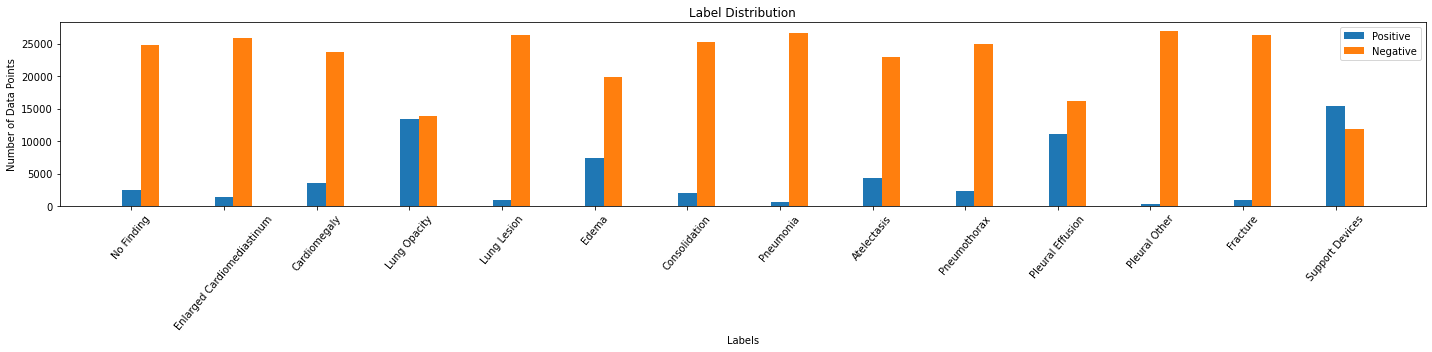

27259


In [66]:
#training
plot_label_distribution(client2_split[0])
print(len(client2_split[0]))

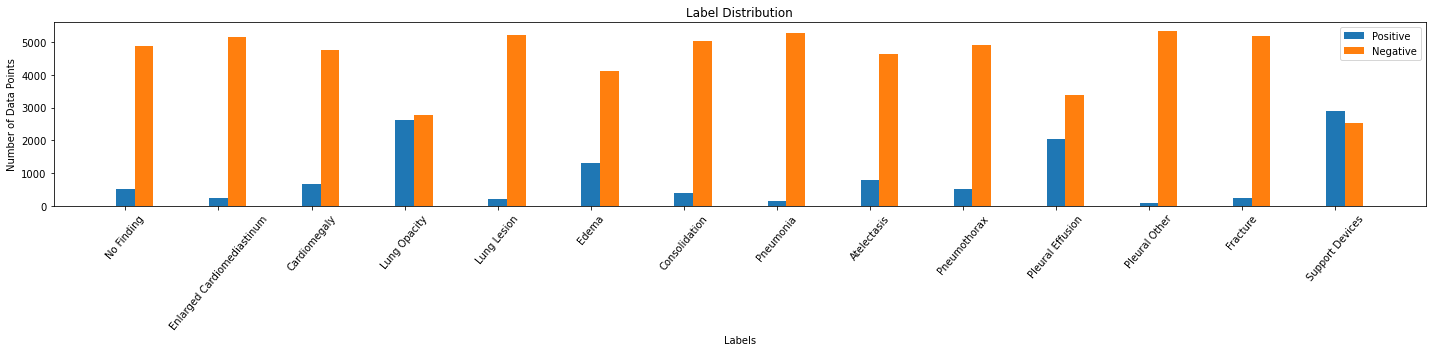

5419


In [67]:
#validation
plot_label_distribution(client2_split[1])
print(len(client2_split[1]))

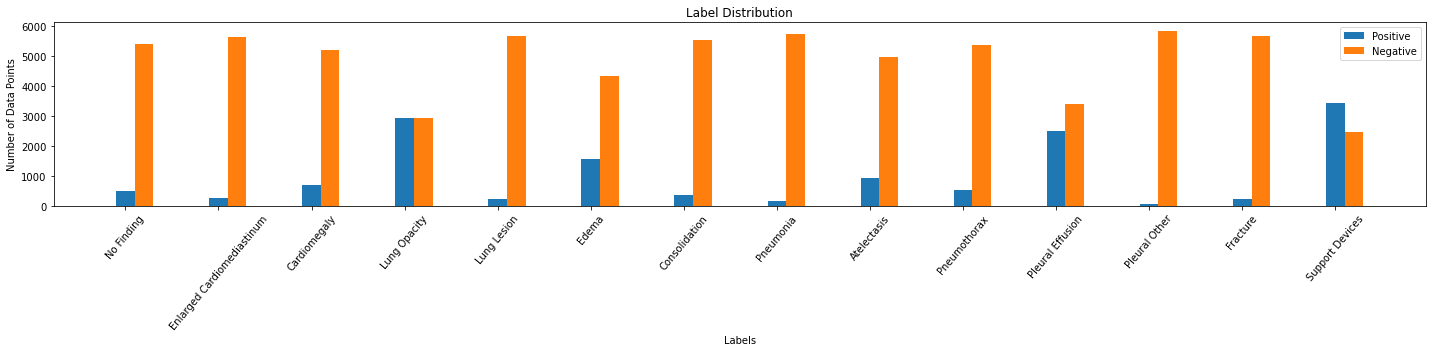

5893


In [68]:
#test
plot_label_distribution(client2_split[2])
print(len(client2_split[2]))

### Client 3

In [31]:
client3_path = './CheXpert-v1.0-small/client3.csv'
client3 = pd.read_csv(client3_path)

In [32]:
client3.fillna(0, inplace=True)
client3.replace(-1, 0, inplace=True)

In [33]:
client3.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/train/patient00006/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CheXpert-v1.0-small/train/patient00012/study3/...,Female,61,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/train/patient00012/study2/...,Female,55,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,CheXpert-v1.0-small/train/patient00012/study1/...,Female,55,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
len(client3)

38024

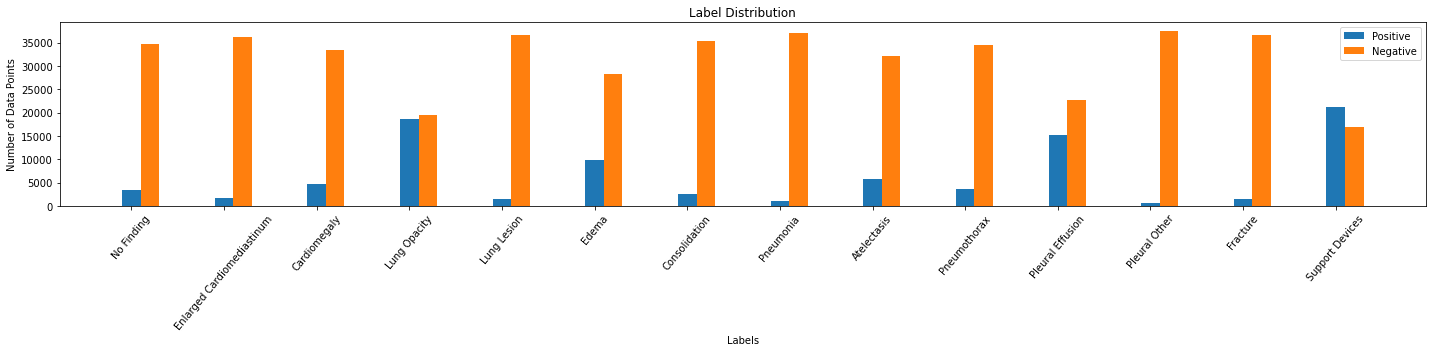

In [34]:
pos3, neg3 = plot_label_distribution(client3)

In [35]:
pos3

No Finding                     3406
Enlarged Cardiomediastinum     1798
Cardiomegaly                   4616
Lung Opacity                  18557
Lung Lesion                    1399
Edema                          9821
Consolidation                  2624
Pneumonia                       973
Atelectasis                    5805
Pneumothorax                   3603
Pleural Effusion              15227
Pleural Other                   548
Fracture                       1459
Support Devices               21131
dtype: int64

#### Train, Val, Test

In [70]:
client3_path = './CheXpert-v1.0-small/client3/'
client3_split_paths = [client3_path+'client_train.csv', client3_path+'client_val.csv', client3_path+'client_test.csv']
client3_split = [process_csv_file(path) for path in client3_split_paths]

Number of patients in splits: [9034, 1936, 1936]  
Number of images in splits: [26875, 5643, 5506]

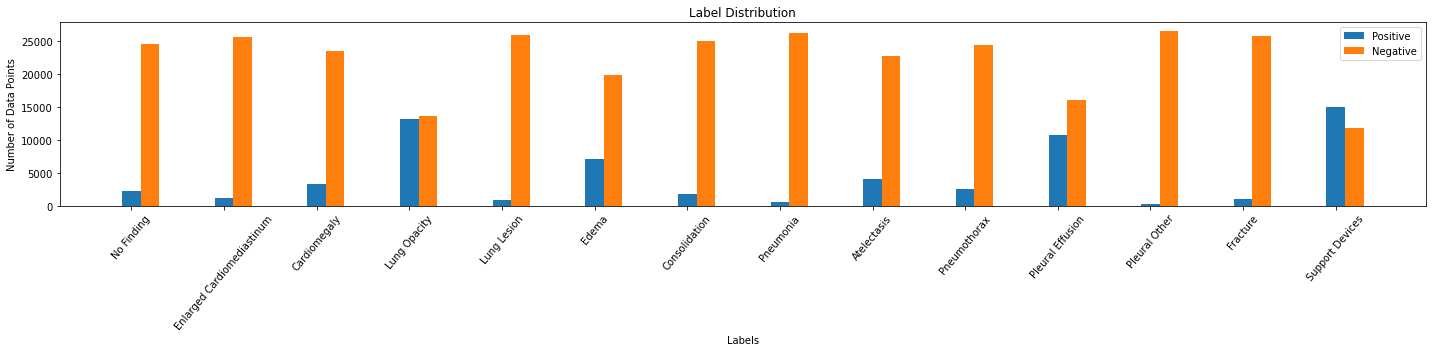

26875


In [71]:
#training
plot_label_distribution(client3_split[0])
print(len(client3_split[0]))

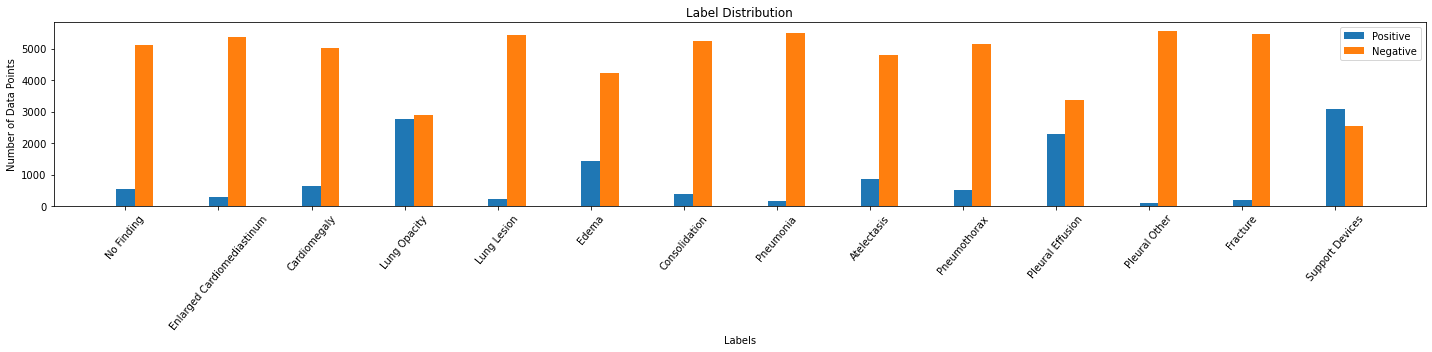

5643


In [72]:
#validation
plot_label_distribution(client3_split[1])
print(len(client3_split[1]))

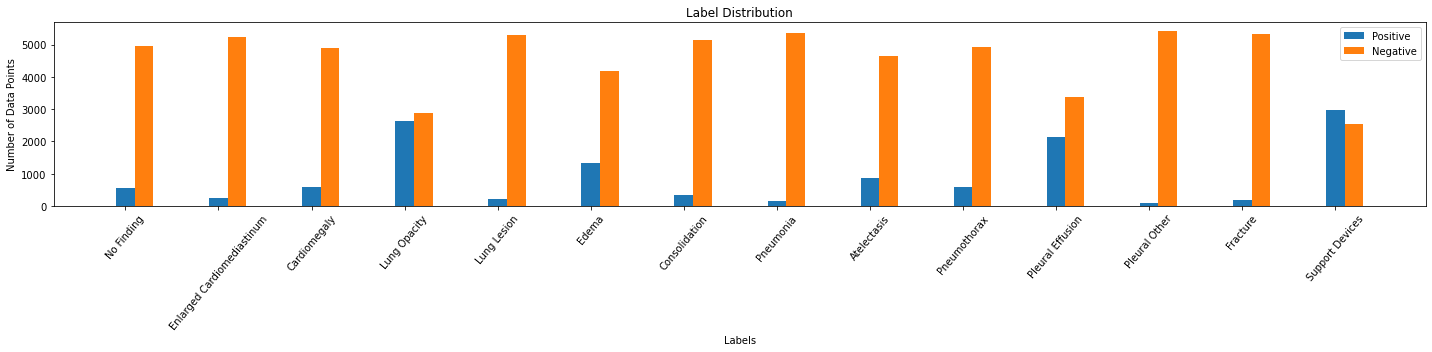

5506


In [74]:
#test
plot_label_distribution(client3_split[2])
print(len(client3_split[2]))

### Client 4

In [36]:
client4_path = './CheXpert-v1.0-small/client4.csv'
client4 = pd.read_csv(client4_path)

In [37]:
client4.fillna(0, inplace=True)
client4.replace(-1, 0, inplace=True)

In [38]:
client4.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CheXpert-v1.0-small/train/patient00007/study1/...,Male,69,Frontal,AP,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/train/patient00007/study2/...,Male,69,Frontal,AP,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,CheXpert-v1.0-small/train/patient00008/study1/...,Male,81,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [75]:
len(client4)

37614

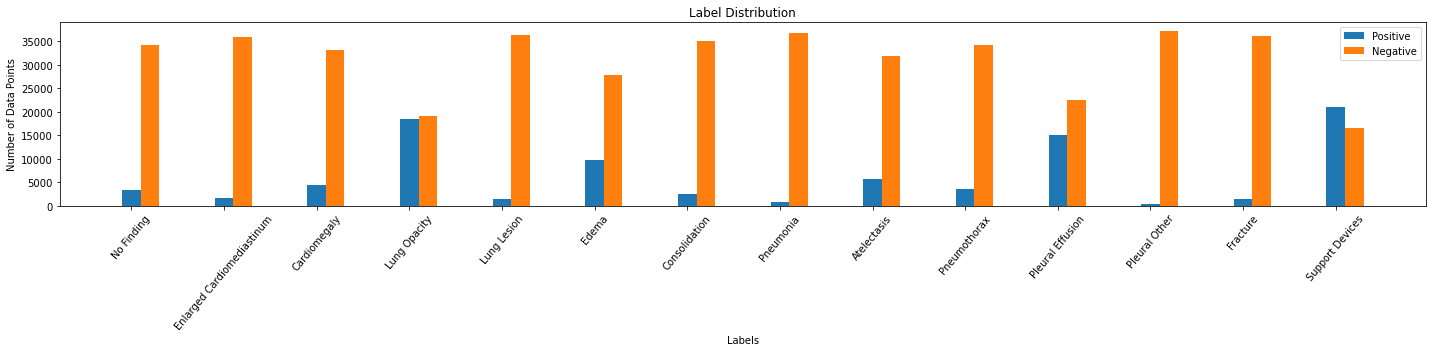

In [39]:
pos4, neg4 = plot_label_distribution(client4)

In [40]:
pos4

No Finding                     3340
Enlarged Cardiomediastinum     1790
Cardiomegaly                   4510
Lung Opacity                  18514
Lung Lesion                    1404
Edema                          9722
Consolidation                  2559
Pneumonia                       925
Atelectasis                    5799
Pneumothorax                   3505
Pleural Effusion              15083
Pleural Other                   489
Fracture                       1562
Support Devices               20994
dtype: int64

#### Train, Val, Test

In [76]:
client4_path = './CheXpert-v1.0-small/client0/'
client4_split_paths = [client4_path+'client_train.csv', client4_path+'client_val.csv', client4_path+'client_test.csv']
client4_split = [process_csv_file(path) for path in client4_split_paths]

Number of patients in splits: [9036, 1936, 1936]  
Number of images in splits: [26344, 5629, 5641]

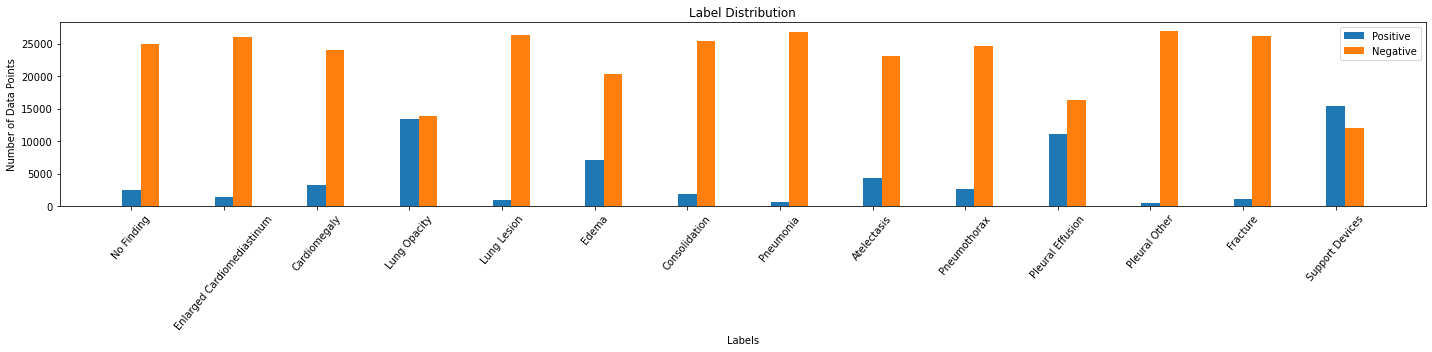

27325


In [77]:
#training
plot_label_distribution(client4_split[0])
print(len(client4_split[0]))

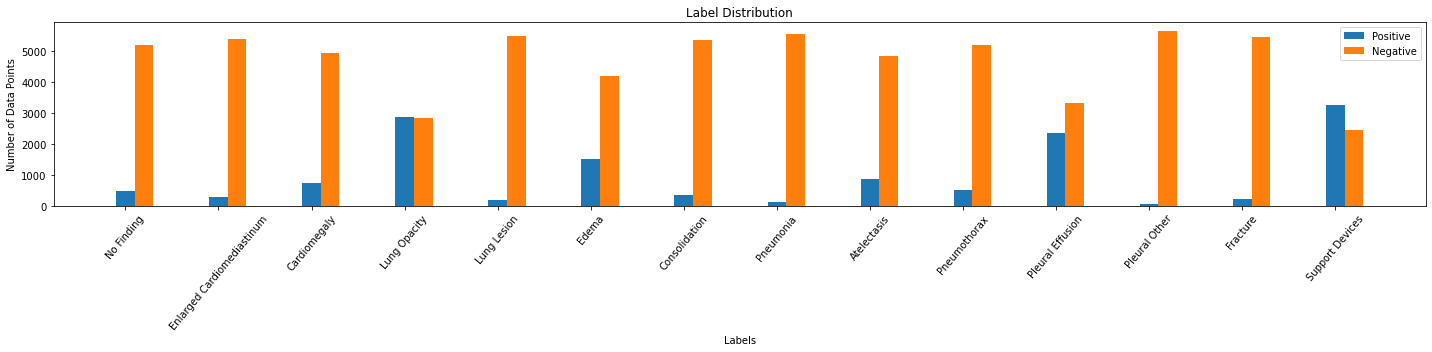

5698


In [78]:
#validation
plot_label_distribution(client4_split[1])
print(len(client4_split[1]))

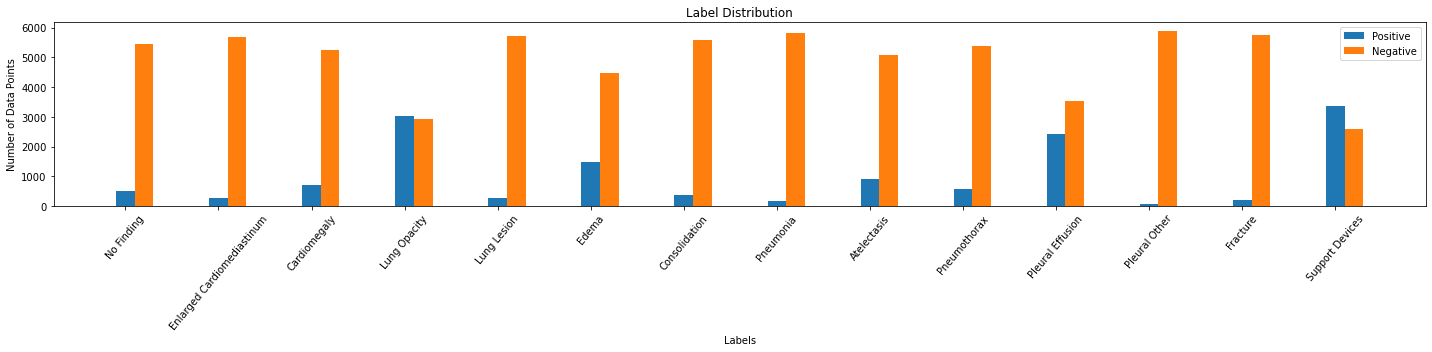

5960


In [79]:
#test
plot_label_distribution(client4_split[2])
print(len(client4_split[2]))